# <a name="0.0"></a>Содержание:
* [Описание проекта](#0.)
    - [Описание данных](#0.1.) 
* [Шаг 1. Предварительный анализ](#1.)
    - [Импорт библиотек](#1.1.)
    - [Изучение общей информации](#1.2.)
    - [Анализ отдельных столбцов](#1.3.)
    - [Вывод](#1.4.)
* [Шаг 2. Предобработка данных](#2.)
    - [Заполняем пропуски](#2.1)
    - [Вывод](#2.2)
    - [Заменяем типы](#2.3)
    - [Вывод](#2.4)
    - [Удаляем дубликаты](#2.5)
    - [Вывод](#2.6)
    - [Выделяем леммы](#2.7)
    - [Вывод](#2.8)
    - [Категоризируем данные](#2.9)
    - [Вывод](#2.10)
* [Шаг 3. Анализ зависимостей](#3.)
    - [Есть ли зависимость между наличием детей и возвратом кредита в срок?](#3.1)
    - [Есть ли зависимость между семейным положением и возвратом кредита в срок?](#3.2)
    - [Есть ли зависимость между уровнем дохода и возвратом кредита в срок?](#3.3)
    - [Есть ли зависимость между целью кредита и возвратом кредита в срок?](#3.4)
* [Шаг 4. Сформируем выводы](#4.)

<a name="0."></a>
## Описание проекта
На основании предоставленных банком данных нужно определить, влияет ли семейное положение и количество детей на вероятность появления просрочек по кредиту<br>
<font size="2">([к содержанию](#0.0))</font>

<a name="0.1"></a>
### Описание данных
- children — количество детей
- days_employed — трудовой стаж (дни)
- dob_years — возраст клиента (лет)
- education — уровень образования заёмщика
- education_id — уровня образования (индекс)
- family_status — семейное положение
- family_status_id — семейного положения (индекс)
- gender — пол заёщика
- income_type — тип занятости
- debt — признак наличия задолженностей по возврату
- total_income — ежемесячный доход
- purpose — цель получения кредита<br>
<font size="2">([к содержанию](#0.0))</font>

<a name="1."></a>
## Шаг 1. Откройте файл с данными и изучите общую информацию
<font size="2">([к содержанию](#0.0))</font>

<a name="1.1."></a>
### Импорт библиотек
<font size="2">([к содержанию](#0.0))</font>

In [39]:
import pandas as pd
from pymystem3 import Mystem
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<a name="1.2."></a>
### Изучение общей информации
<font size="2">([к содержанию](#0.0))</font>

In [2]:
data=pd.read_csv('./datasets/data.csv')
data.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья


In [3]:
data.tail(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
data.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [6]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


<a name="1.3."></a>
### Анализ отдельных столбцов
<font size="2">([к содержанию](#0.0))</font>

In [7]:
#количество строк, в которых есть заглавные буквы
data['education'].str.isupper().sum()

1093

In [8]:
#Различные значения в стобце об образовании
data['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

In [9]:
#Странные значения в столбце с трудовым стажем
data[data['days_employed']<0]['days_employed'].count()

15906

In [10]:
#Количество детей
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [11]:
#Переводим всё в нижний регистр для анализа данных
data['education']=data['education'].str.lower()
data['family_status']=data['family_status'].str.lower()

In [12]:
#Смотрим на строки с пропусками
data.loc[data['days_employed'].isnull()]['education'].value_counts()

среднее                1540
высшее                  544
неоконченное высшее      69
начальное                21
Name: education, dtype: int64

<a name="1.4."></a>
### Вывод:
- Размер файла: файл содержит 21525 записей о клиентах. Каждая запись включает в себя 12 атрибутов
- Обнаруженные пропуски: в 2174 записях обнаружены пропуски в столбцах days_employed и total_income (может это безработные?)
- Наименование столбцов: лишних пробелов, скрытых символов и различеных регистров не обнаружено
- Наличие отрицательных значений не допускается<br>
<font size="2">([к содержанию](#0.0))</font>

<a name="2."></a>
## Шаг 2. Предобработка данных
<font size="2">([к содержанию](#0.0))</font>

<a name="2.1"></a>
### Определяем и заполняем пропущенные значения
<font size="2">([к содержанию](#0.0))</font>

In [13]:
#Заполняем пропуски по стажу
def fill_days_employed(row):
    if pd.isnull(row['days_employed']):
        if row['income_type']=='безработный':
            return median_values['days_employed_median']['безработный']
        if row['income_type']=='в декрете':
            return median_values['days_employed_median']['в декрете']
        if row['income_type']=='госслужащий':
            return median_values['days_employed_median']['госслужащий']
        if row['income_type']=='компаньон':
            return median_values['days_employed_median']['компаньон']
        if row['income_type']=='пенсионер':
            return median_values['days_employed_median']['пенсионер']
        if row['income_type']=='предприниматель':
            return median_values['days_employed_median']['предприниматель']
        if row['income_type']=='сотрудник':
            return median_values['days_employed_median']['сотрудник']
        if row['income_type']=='студент':
            return median_values['days_employed_median']['студент']
    return row['days_employed']

#По доходу
def fill_total_income(row):
    if pd.isnull(row['total_income']):
        if row['income_type']=='безработный':
            return median_values['total_income_median']['безработный']
        if row['income_type']=='в декрете':
            return median_values['total_income_median']['в декрете']
        if row['income_type']=='госслужащий':
            return median_values['total_income_median']['госслужащий']
        if row['income_type']=='компаньон':
            return median_values['total_income_median']['компаньон']
        if row['income_type']=='пенсионер':
            return median_values['total_income_median']['пенсионер']
        if row['income_type']=='предприниматель':
            return median_values['total_income_median']['предприниматель']
        if row['income_type']=='сотрудник':
            return median_values['total_income_median']['сотрудник']
        if row['income_type']=='студент':
            return median_values['total_income_median']['студент']
    return row['total_income']

def deleteMinus(row):
    if pd.isnull(row['days_employed']):
        return row['days_employed']
    if row['days_employed']>0:
        return row['days_employed']
    else:
        return row['days_employed']*(-1)

data['days_employed']=data.apply(deleteMinus, axis=1)   

#Столбец с количество детей
data.loc[data['children']==-1,'children']=0
anbormal_children_count=data[(data['children']==-1) | (data['children']==20)]['children'].count()
print('Аномальное количество записей о детях {:.2%}'.format(anbormal_children_count/len(data)))

#Столбец с общим трудовым стажем в днях
data['days_employed'].value_counts().reset_index().sort_values('index')
print('Аномальное количество записей о стаже {:.2%}'.format(
    len(data.loc[data['days_employed'].isnull()])/len(data)))

#Выделяем группу без пустых значений
fill_grouped_data=data.loc[data['days_employed'].isnull()!=True].groupby('income_type')

#Анализируем разброс значений внутри групп
fill_grouped_data_stats=[fill_grouped_data['days_employed'].min(), fill_grouped_data['days_employed'].max(), 
                         fill_grouped_data['total_income'].min(), fill_grouped_data['total_income'].max()]

#Сохраняем медианы
median_values=pd.merge(fill_grouped_data['days_employed'].median(),
                       fill_grouped_data['total_income'].median(),
                       how='inner', left_index=True, right_index=True)

median_values.set_axis(['days_employed_median','total_income_median'], axis=1, inplace=True)

#Заполняем пустые значения медиаными значениями (может это можно сделать эффективнее)
data['days_employed']=data.apply(fill_days_employed,axis=1)
data['total_income']=data.apply(fill_total_income, axis=1)

#Столбец с возрастом
data['dob_years'].value_counts().reset_index().sort_values('index').reset_index(drop=True)
print('Аномальное количество записей о возрасте {:.2%}'.format(data[data['dob_years']==0]['dob_years'].count()/len(data)))
data=data.loc[data['dob_years']!=0]

#Удаляем запись с неопределившимся полом
data = data.loc[data['gender'] != 'XNA']

Аномальное количество записей о детях 0.35%
Аномальное количество записей о стаже 10.10%
Аномальное количество записей о возрасте 0.47%


<a name="2.2"></a>
### Вывод


Для расчётов столбец days_employed возьмём по модулю, так как отрицательные значения трудового стажа обусловлены неправильной выгрузкой данных
- [children] - содержит несколько аномальных значений: -1, 20. Их доля составляет всего лишь 1 процент - следовательно, их можно выкинуть или оставить, изменив значение -1 на 0 и приняв 20 детей
- [days_employed] - обнаружены значения NaN. Доля пустых значений составляет 10%. Для того чтобы заполнить пропуски мы:
    - выделяем DataFrame, в котором нет пустых значений
    - изучаем разброс между максимальными и минимальными значениями в трудовом стаже. Ввиду того, что разброс большой, следует использовать медианные значения для заполненеия пропусков
    - создаём с помощью метода merge объединённый DataFrame, в котором находятся медианые значения days_employed и total_income для каждой из групп клиентов
    - Заполняем медианными значениями
- [dob_years] - содержит аномальное значение: 0. Их доля составляет 0.47%
- [education] - аномалий не содержит, нужно удалить повторения
- [education_id] - аномалий не содержит
- [family_status] - аномалий не обнаружено, нужно перевести в нижний регистр следующие записи: Не женат
- [family_status_id] - аномалий не обнаружено
- [gender] - у одного клиента не указан пол
- [income_type] - аномалий не обнаружено
- [debt] - аномалий не обнаружено
- [total_income] - заполняем пропуски (NaN)
- [purpose] -аномалий не обнаружено

Предполагаемая причина наличия пропусков в данных - ошибки на этапе их выгрузки, хотя присутствует доминирование пропусков у людей со средним образованием c типом занятости "сотрудник" (неправильно заполнена анкета или они не работали на официальных местах)<br>
<font size="2">([к содержанию](#0.0))</font>

<a name="2.3"></a>
### Заменяем типы
<font size="2">([к содержанию](#0.0))</font>

In [14]:
data['days_employed']=data['days_employed'].astype('int')
data['total_income']=data['total_income'].astype('int')

In [15]:
data['years_employed']=data['days_employed']/365
print(data.loc[(data['dob_years']-data['years_employed'])<10]['income_type'].value_counts())
def convertToDays(row):
    if (row['dob_years']-row['years_employed'])<10:
        return row['years_employed']/24
    else:
        return row['years_employed']

data['years_employed']=data.apply(convertToDays,axis=1)

#Те значения, которые и опять не вписались в данные, мы отсеиваем (значения с 0 в графе возраст - тоже)
data=data.loc[(data['dob_years']-data['years_employed'])>=10]

пенсионер      3836
безработный       2
Name: income_type, dtype: int64


<a name="2.4"></a>
### Вывод
- Метод to_numeric() не подходит, так как он можете перевести только во float.
- Пропуски уже заполнены, поэтому можно использовать astype().
- Дроби можно спосокойно отбросить, так как потеря нескольких часов трудового времени и нескольких копеек в доходе несущественна
- При анализе связи между стажем и возрастом было обнаружено, что преимущество для пенсионеров указана неверная размерность стажа. Предполагается, что она указана в часах.<br>
<font size="2">([к содержанию](#0.0))</font>

<a name="2.5"></a>
### Удаляем дубликаты
<font size="2">([к содержанию](#0.0))</font>

In [16]:
data.duplicated().sum()

71

In [17]:
data=data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

<a name="2.6"></a>
### Вывод
Ручной поиск дубликатов производить бессмыслено, так как уже устранены пустые значения, а метод duplicated() нашёл 71 значение, которые были просто удалены из данных.<br>
Возможная причина дубликатов: клиент несколько раз подавал заявление на кредит<br>
<font size="2">([к содержанию](#0.0))</font>

<a name="2.7"></a>
### Выделяем леммы
<font size="2">([к содержанию](#0.0))</font>

In [18]:
%%time
m = Mystem()
#Выделяем леммы
all_lemmas=""
for i in data['purpose']:
    all_lemmas+=' '+''.join((m.lemmatize(i))[:-1]) #убираем символ окончания строки
    
data['purpose'].value_counts()
#Создаём список с наиболее характерными целями
purpose_dictionary=['свадьба', 'коммерческий', 'жилье', 
                    'ремонт', 'автомобиль', 'образование', 'недвижимость']



def lemmatize(row):
    lemmas_record=m.lemmatize(row['purpose'])
    for word in lemmas_record:
        if word in purpose_dictionary:
            return word
    return row['purpose']


data['lemmas']=data.apply(lemmatize,axis=1)

Wall time: 8h 43min 19s


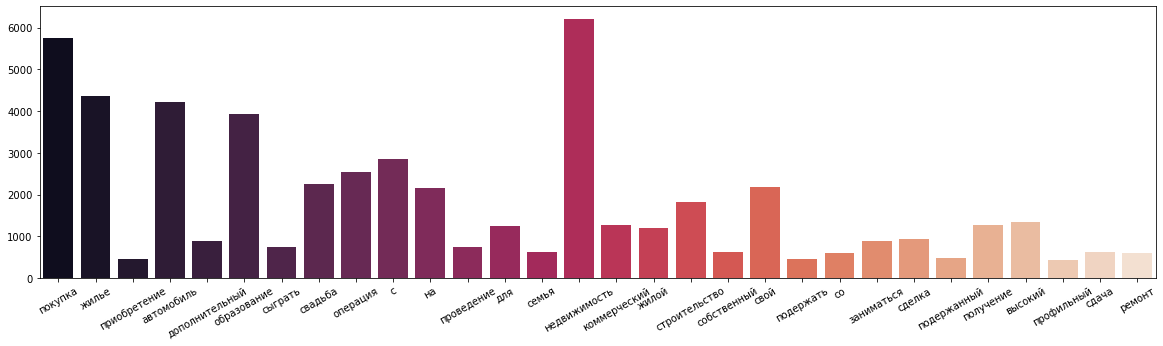

In [41]:
plt.figure(figsize=(20,5))
all_lemmas_dict=dict(Counter(all_lemmas.split()))
all_lemmas_keys=list(all_lemmas_dict.keys())
all_lemmas_values=list(all_lemmas_dict.values())
sns.barplot(x=all_lemmas_keys, y=all_lemmas_values, palette="rocket")
plt.xticks(rotation=30)
plt.show()

In [19]:
purpose=data['lemmas'].value_counts()
purpose

недвижимость    4919
автомобиль      4210
образование     3927
жилье           3763
свадьба         2260
коммерческий    1281
ремонт           597
Name: lemmas, dtype: int64

<a name="2.8"></a>
### Вывод
Была выполнена следующая последовательность действий:
- Создали словарь с наиболее часто встречающимися целями. 
- Создали экземпляр класса Mystem
- Вызвали метод, который возвращает список строк
- Нашли соответствие между целью с леммы и целью в словаре
- Cохранили значение
- Если совпадений в словаре нет, сохраняем неизменённую цель 
- Отделили коммерческую недвижимость от простой недвижимости и жилья<br>
<font size="2">([к содержанию](#0.0))</font>

<a name="2.9"></a>
### Категоризируем данные
<font size="2">([к содержанию](#0.0))</font>

In [21]:
data['total_income'].min()
data['total_income'].max()
data['total_income'].median()

low_income=np.quantile(data['total_income'], .25)
high_income=np.quantile(data['total_income'], .75)

#Преобразуем в int
data['years_employed']=data['years_employed'].astype('int')

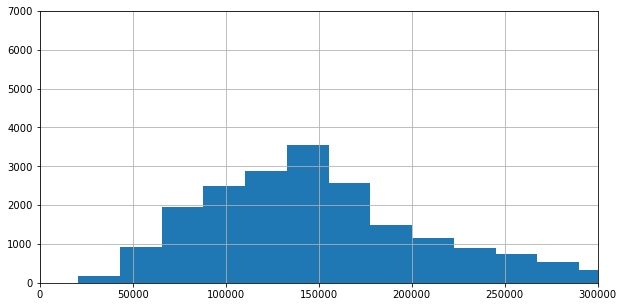

In [54]:
#Посмотрим на распределение
plt.figure(figsize=(10,5))
plt.axis([0,300_000,0,7_000])
dataForPlot['total_income'].hist(bins=100)

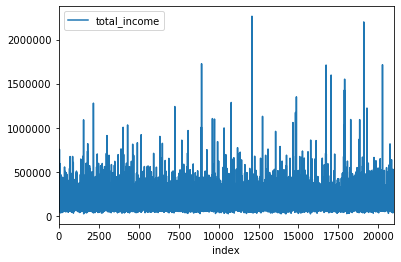

In [22]:
dataForPlot=data.reset_index()
dataForPlot.plot(x='index',y='total_income')

In [23]:
def sliplitIncome(row):
    if row['total_income']<low_income:
        return "низкий"
    if row['total_income']>high_income:
        return "высокий"
    else:
        return "средний"
    
data['total_income_type']=data.apply(sliplitIncome,axis=1)

<a name="2.10"></a>
### Вывод
Добавляем словарь с доходом населения: то что левее 25% квантиля - низкий доход, высокий доход - то что правее 75% квантиля. Это поможет разделить население по уровню дохода 
<br>
<font size="2">([к содержанию](#0.0))</font>

<a name="3."></a>
## Шаг 3. Анализ зависимостей
<font size="2">([к содержанию](#0.0))</font>

<a name="3.1"></a>
### Есть ли зависимость между наличием детей и возвратом кредита в срок?
<font size="2">([к содержанию](#0.0))</font>

In [55]:
grouped_data_by_children=data.groupby('children').agg({'debt':['count','sum']})
grouped_data_by_children['ratio']=grouped_data_by_children['debt']['sum']/grouped_data_by_children['debt']['count']
#print(grouped_data_by_children)


pivot_table_by_children=pd.pivot_table(data, index=['children'], values=['debt'], aggfunc=['count','sum'])
pivot_table_by_children['ratio']=pivot_table_by_children['sum']['debt']/pivot_table_by_children['count']['debt']
pivot_table_by_children

,count,sum,ratio
,debt,debt,
children,,,
0,13748,1039,0.075575
1,4734,436,0.092100
2,2027,192,0.094721
3,324,26,0.080247
4,40,4,0.100000
5,9,0,0.000000
20,75,8,0.106667


- семьи, в которых нет детей, реже всего задерживают платёж по кредиту
- с увеличением количества детей имеется тенденция увеличения количества просроченных кредитов
- в случае семей с 3 детьми наблюдается ситуация увеличения вероятности вовремя выплатить кредит
- по семьям, в которых 5 детей, недостаточно информации и требуются соответствующие уточнения

К тому же необходимы уточненния по-поводу выгрузки данных из сети по количеству детей. Если анамальному значению -1 соответствуют семьи с 1 ребёнком, то необходимо сделать соответствующие изменения в проекте

<a name="3.2"></a>
### Есть ли зависимость между наличием детей и возвратом кредита в срок?
<font size="2">([к содержанию](#0.0))</font>

In [57]:
grouped_data_by_family=data.groupby('family_status').agg({'debt':['count','sum']})
grouped_data_by_family['ratio']=grouped_data_by_family['debt']['sum']/grouped_data_by_family['debt']['count']
#grouped_data_by_family

pivot_table_by_family=pd.pivot_table(data, index=['family_status'], values=['debt'], aggfunc=['count','sum'])
pivot_table_by_family['ratio']=pivot_table_by_family['sum']['debt']/pivot_table_by_family['count']['debt']
pivot_table_by_family

,count,sum,ratio
,debt,debt,
family_status,,,
в разводе,1163,84,0.072227
вдовец / вдова,935,61,0.065241
гражданский брак,4046,376,0.092931
женат / замужем,12058,913,0.075717
не женат / не замужем,2755,271,0.098367


- Статистика показывает, что вдове/вдовцу, свойственно реже пропускать дни платежей по кредиту (возможно, наследство, оставшееся от умершего партнёра, позволяет проще планировать бюджет по статье возвращения кредитных денег)
- Парам с зарегестрированными семейными отношениями свойстве чаще соблюдать срок выплат по кредиту, чем семьям с неузаконенными отношениями.
- Люди в разводе платят по кредитам наравне с семьями, в которых узаконены семейные отношения (в случае развода и имущество и долги платятся пополам)
- Наиболее злостными неплотельщиками по кредитам являются люди без постоянного партнёра. Возможно, отсутствие финансового плеча, в виде супруга/супруги не позволяет им планировать платежи по кредиту
- Люди в гражданском браке также часто как и холостые/незамужние пропускают платежи по кредуту. Возможно таже самая причина

<a name="3.3"></a>
### Есть ли зависимость между наличием детей и возвратом кредита в срок?
<font size="2">([к содержанию](#0.0))</font>

In [61]:
grouped_data_by_income=data.groupby('total_income_type').agg({'debt':['count','sum']})
grouped_data_by_income['ratio']=grouped_data_by_family['debt']['sum']/grouped_data_by_family['debt']['count']
grouped_data_by_income

pivot_table_by_income=pd.pivot_table(data, index=['total_income_type'], values=['debt'], aggfunc=['count','sum'])
pivot_table_by_income['ratio']=pivot_table_by_income['sum']['debt']/pivot_table_by_income['count']['debt']
pivot_table_by_income

,count,sum,ratio
,debt,debt,
total_income_type,,,
высокий,5239,377,0.071960
низкий,5239,419,0.079977
средний,10479,909,0.086745


- Людям с высокими доходами не свойственно пропускать платежи по кредиту (возможно, во-первых, они боятся за свой авторитет и имидж, а во-вторых, умеют планировать бюджет)
- Люди с низким доходом также пытаются вовремя платить по креду (возможно, опасаются приставов, арестов имущества и штрафов (пени) за просрочку)

<a name="3.4"></a>
### Есть ли зависимость между целью кредита и возвратом кредита в срок?
<font size="2">([к содержанию](#0.0))</font>

In [62]:
grouped_data_by_purpose=data.groupby('lemmas').agg({'debt':['count','sum']})
grouped_data_by_purpose['ratio']=grouped_data_by_family['debt']['sum']/grouped_data_by_family['debt']['count']
#grouped_data_by_purpose

pivot_table_by_purpose=pd.pivot_table(data, index=['lemmas'], values=['debt'], aggfunc=['count','sum'])
pivot_table_by_purpose['ratio']=pivot_table_by_purpose['sum']['debt']/pivot_table_by_purpose['count']['debt']
pivot_table_by_purpose

,count,sum,ratio
,debt,debt,
lemmas,,,
автомобиль,4210,393,0.093349
жилье,3763,267,0.070954
коммерческий,1281,97,0.075722
недвижимость,4919,369,0.075015
образование,3927,367,0.093456
ремонт,597,35,0.058626
свадьба,2260,177,0.078319


- кредиты на автомобили и образование чаще остальных оплачиваются с просрочкой. Возможно причина в том, что данные категории товаров являются долгоокупаемыми.
- кредиты на оплату ремонта, чаще остальных оплачиваются вовремя. Возможно необходимость планирования денег, ресурсов и в времени заставляет людей более серьёзно относиться к оплате кредитов
- кредиты на жильё, комерческую недвижимость и жилую недвижимость (возможно второе или третье) и свадьбу имеют примерно одинаковую вероятность быть оплаченными вовремя. Однако кредит на жильё (ипотека на единственное жильё), как правило, чаще остальных из данной группы оплачивается вовремя

<a name="4."></a>
## Шаг 4. Сформируем выводы
<font size="2">([к содержанию](#0.0))</font>

In [63]:
#Цели в процентах
print(purpose/purpose.sum()*100)

недвижимость    23.471871
автомобиль      20.088753
образование     18.738369
жилье           17.955814
свадьба         10.783986
коммерческий     6.112516
ремонт           2.848690
Name: lemmas, dtype: float64


В ходе исследования надёжности заёмщиков были определены категории граждан, которые в большей степени склонны вовремя платить по кредитным займам

Исходные данные содержали множество аномальных значений. Среди 21525 записей о клиентах было выявлено:
- 2174 записи в которых остуствовали значения в графах общий трудовой стаж и ежемесячный доход (преимущественно отсутствовали записи 
- 71 повторяющаяся запись;
- 1 запись, в которой отсутствовал пол клиента (запись удалена из финального набора данных)
- 47 записей с количеством детей, равным -1
- 76 записей с количеством детей, равным 20

Заполнение пустых значений осуществлялось по следующей методике. Из генеральной совокупности данных производилась выборка строк, в которых нет пустых атрибутов. Данная выборка группировалось по типу работников и создавалась новая таблица,в которой содержалась информация о максимальных и минимальных значениях по столбцам трудового стажа и дохода. На основании того, что в таблице разброс между максимальным и минимальным значениями велик (для стажа СКО=170 237 дней/часов, а для дохода 136060 рублей), было принято решения заполнять по средним значениями для каждой категории (среднее по всем категориям 89897 дней и 181794 рублей).<br>
Все повторяющиеся записи были удалены. Предполагаемая причина их появления - один и тот же клиент с одним и тем же заявлением несколько раз был занесён в БД.<br>
Для записей, у которых количество детей равно -1 было принято решения заменить на 0. Записи, в которых количество детей равно 20, остались без изменений. Фактическую природу этих данных необходимо уточнить. Возможно 20 детей соответствует записи с 2 детьми, а -1 - 1.<br>

При последующих выгрузках из данной базы (баз) следует уделить внимание к таким параметрам как:
- уровень образования
- общий трудовой стаж
В столбце уровень образовани было обнаружено 1093 записей с буквами в верхнем регистре. Столбец с струдовым стажем, помимо обозначенных выше проблем с отсутсвующими значениями, содержит множество строк (15906) с отрицательными значениями. В рамках данного анализа данных отрицательные значения были взяты по модулю, однако следует уточнить истинную природу данной ошибки.
Также при анализе данных была обнаружено, что у некоторых клиентов общий трудовой стаж (его размерность по условию исчисляется в днях) больше возраста клиента в десятки раз. Для устранения данной ошибки в анализе было принято следующие преобразование: для клиентов, у которых разница между стажем в годах и фактическим возрастом меньше 10, размерность указана в часах. Как показывает анализ данных, неверный формат записи о стаже указан неправильно для пенсионеров (3836) и безработных (2)

Наиболее частым целями на кредит среди представляенных записей являются:
- недвижимость    23%
- автомобиль      20%
- образование     19%
- жилье           18%
- свадьба         11%
- коммерческий     6%
- ремонт           3%

Наиболее предпочтительное кредитуемое лицо - это вдовец/вдова (6,52%), у которого нет детей (7,55%), доход больше 196 тыс. руб (7,19%) и цель его кредита - сделать ремонт в квартире (5,86%). В скобках указана вероятность просрочки по кредитному платежу 
